In [1]:
#importing ibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the files
train=pd.read_csv("train_v9rqX0R (1).csv")
test=pd.read_csv("test_AbJTz2l (1).csv")
sample_sub=pd.read_csv("sample_submission_8RXa3c6 (1).csv")

In [3]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [4]:
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [5]:
#submission format
sample_sub.head(3)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000


In [6]:
#creating submission file and storing Item_Identifier and Outlet_Identifier values to it.
submission = pd.DataFrame(test[['Item_Identifier','Outlet_Identifier']])
submission.head()
     

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


# EDA


In [7]:
# find shape
train.shape

(8523, 12)

In [8]:
test.shape

(5681, 11)

In [9]:
#info

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [12]:
#statistical descrptn

In [13]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


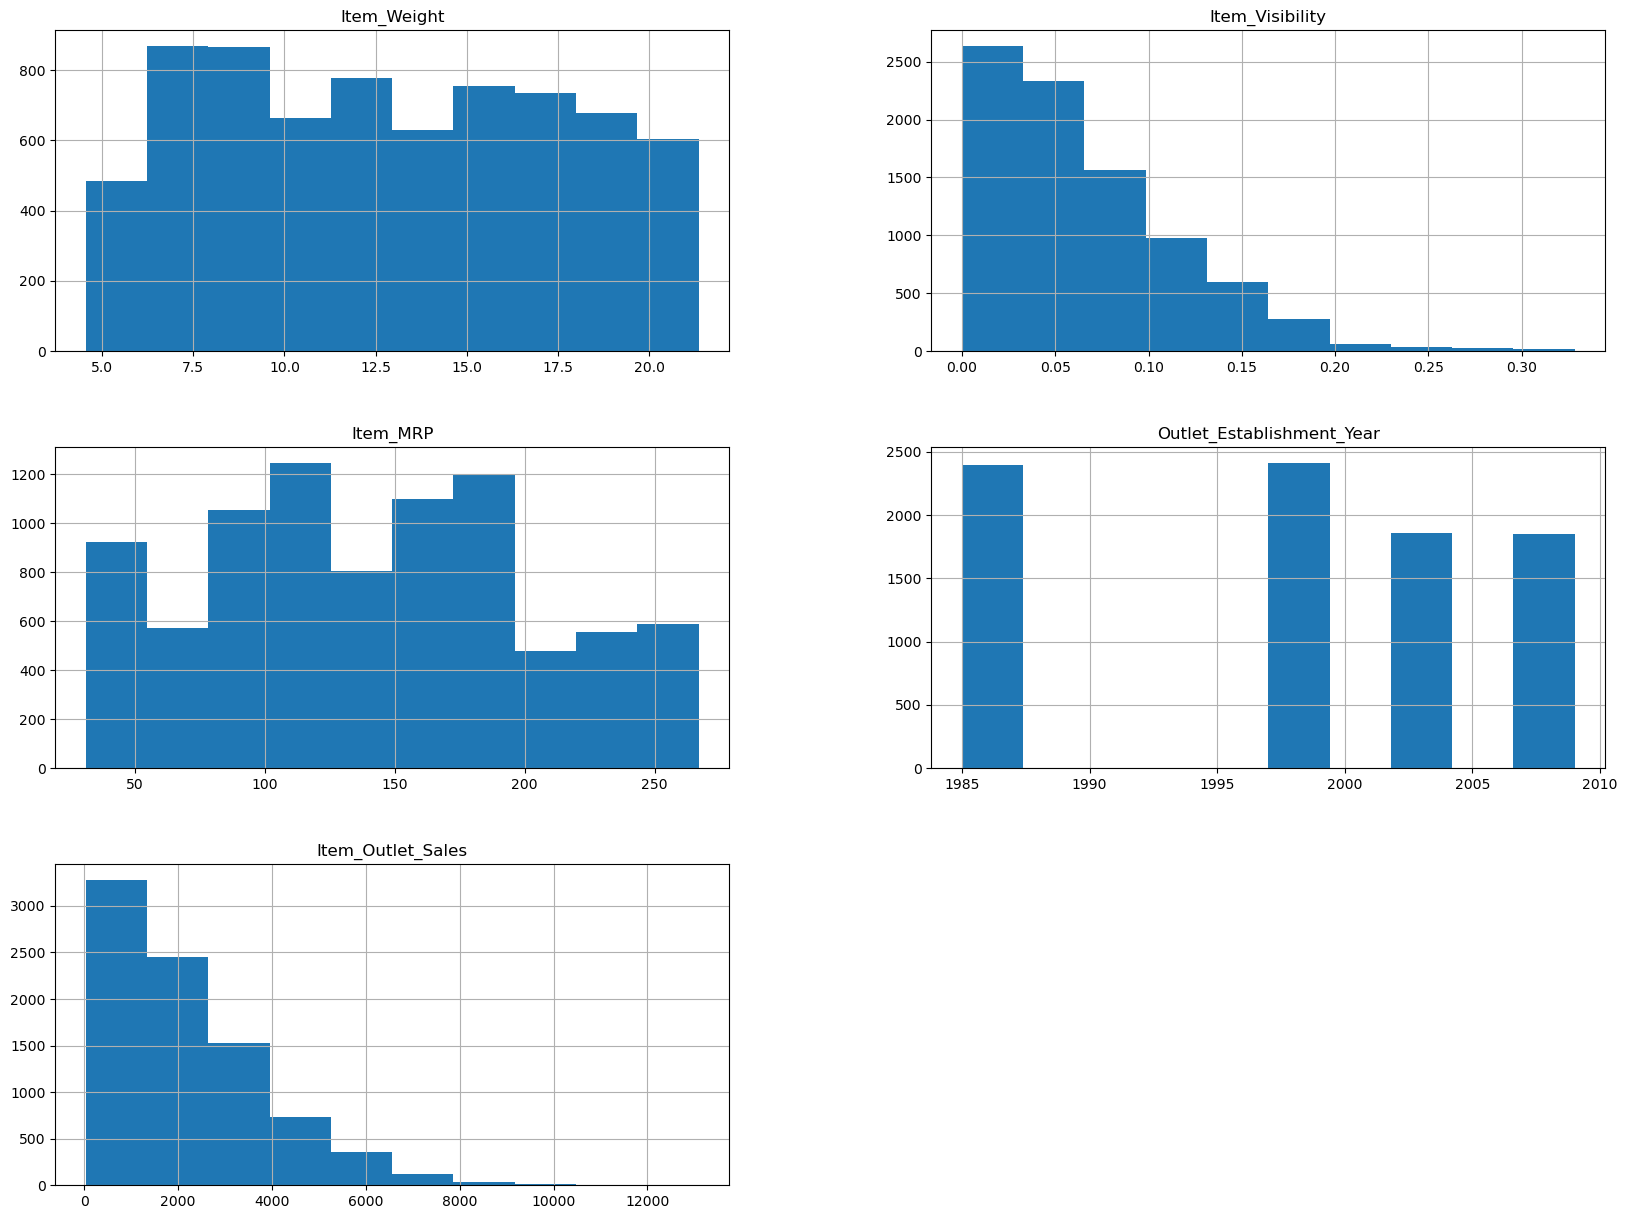

In [15]:
freqgraph=train.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()


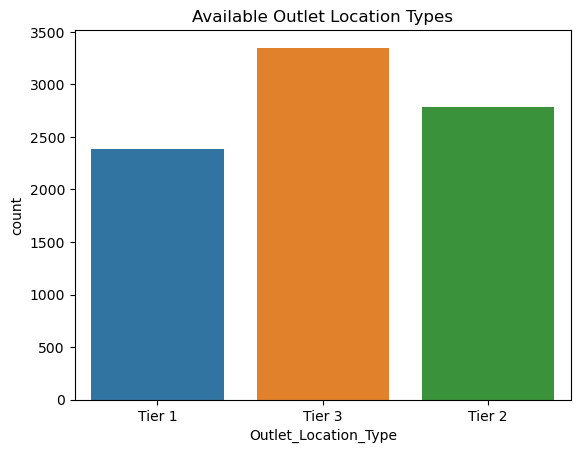

In [16]:
sns.countplot(train['Outlet_Location_Type'])
plt.title("Available Outlet Location Types")
plt.show()

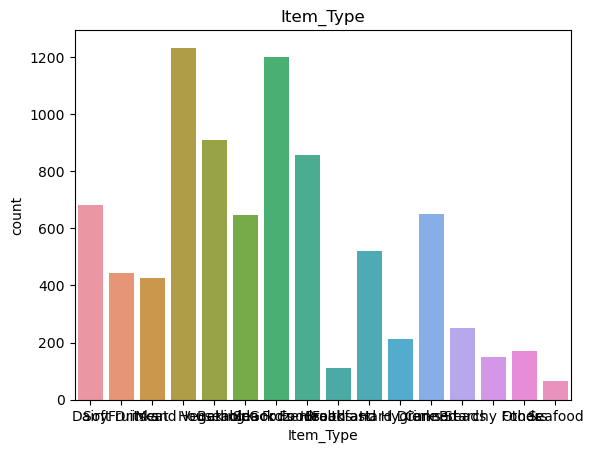

In [17]:
sns.countplot(train['Item_Type'])
plt.title("Item_Type")
plt.show()

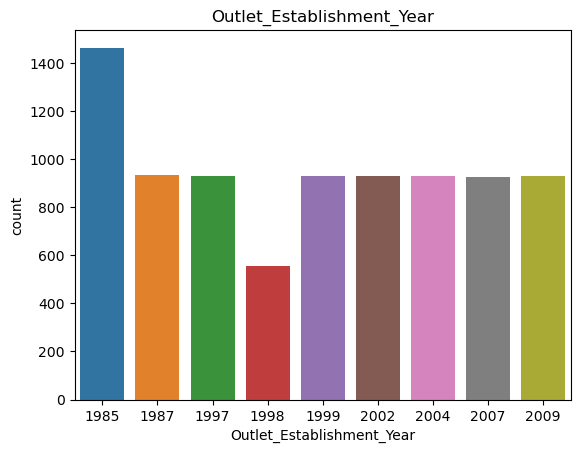

In [18]:
sns.countplot(train['Outlet_Establishment_Year'])
plt.title("Outlet_Establishment_Year")
plt.show()

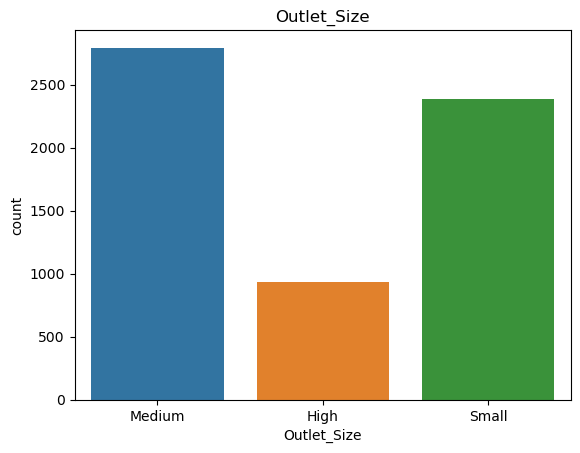

In [19]:
sns.countplot(train['Outlet_Size'])
plt.title("Outlet_Size")
plt.show()

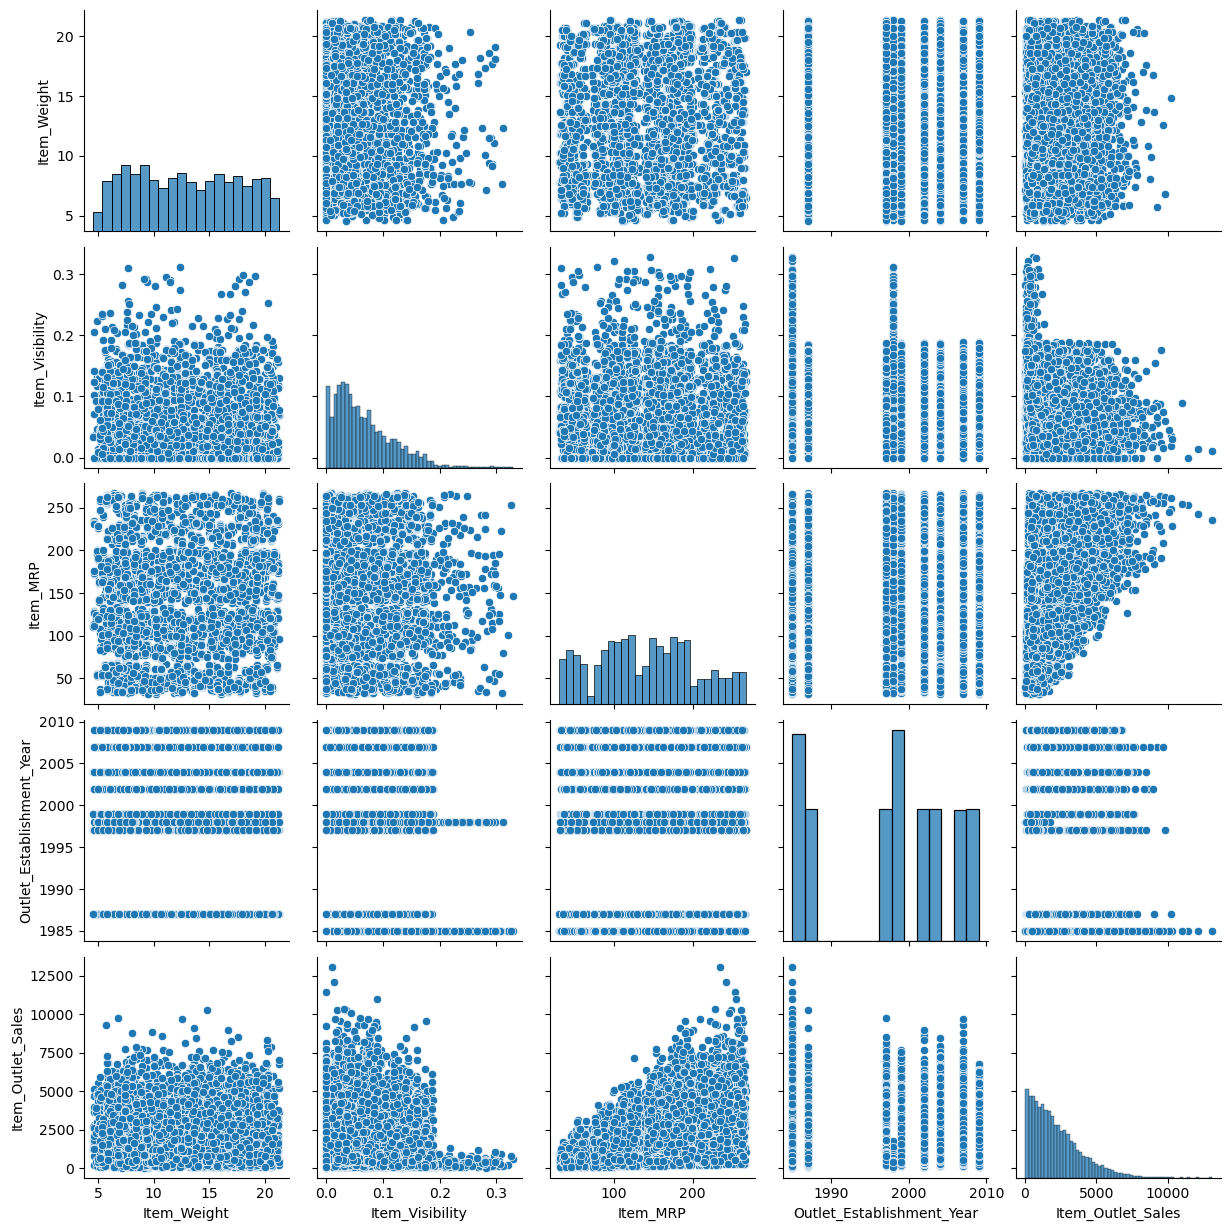

In [20]:
sns.pairplot(train)
plt.show()

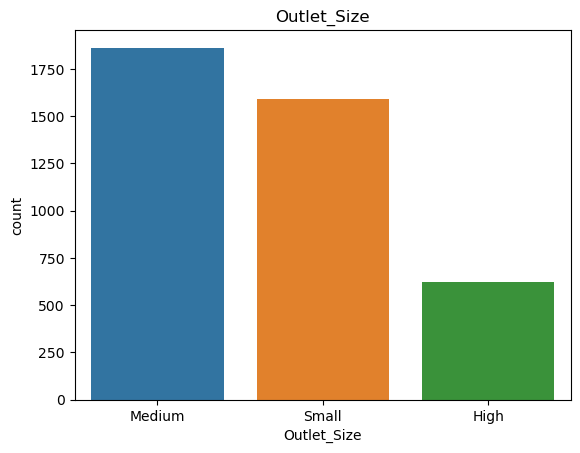

In [21]:
sns.countplot(test['Outlet_Size'])
plt.title("Outlet_Size")
plt.show()

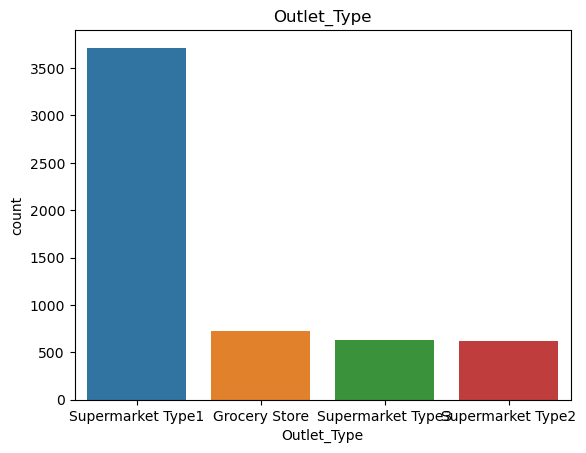

In [22]:
sns.countplot(test['Outlet_Type'])
plt.title("Outlet_Type")
plt.show()


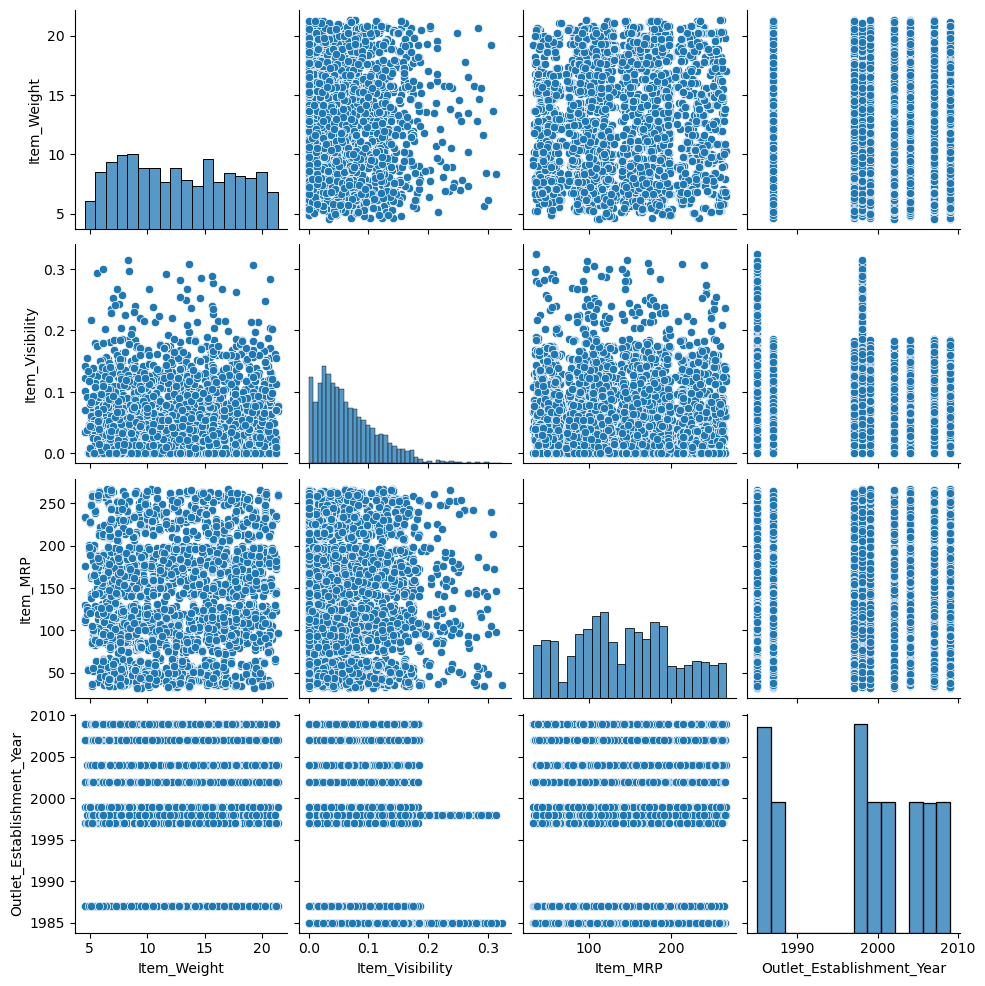

In [23]:
sns.pairplot(test)
plt.show()

# PREPROCESSING


In [24]:
#data types

In [25]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [26]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [27]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [28]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [29]:
#checking null values

In [30]:

train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [31]:
train.Outlet_Size = train.Outlet_Size.fillna('Medium')


In [32]:
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())

In [33]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [34]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [35]:
test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())

In [36]:
test.Outlet_Size = test.Outlet_Size.fillna('Medium')

In [37]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le=LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet_Identifier','Item_Type','Item_Identifier']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [39]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228


In [40]:
le=LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet_Identifier','Item_Type','Item_Identifier']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [41]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.75,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.30,4,0.038428,4,87.3198,2,2007,1,1,1


<AxesSubplot:>

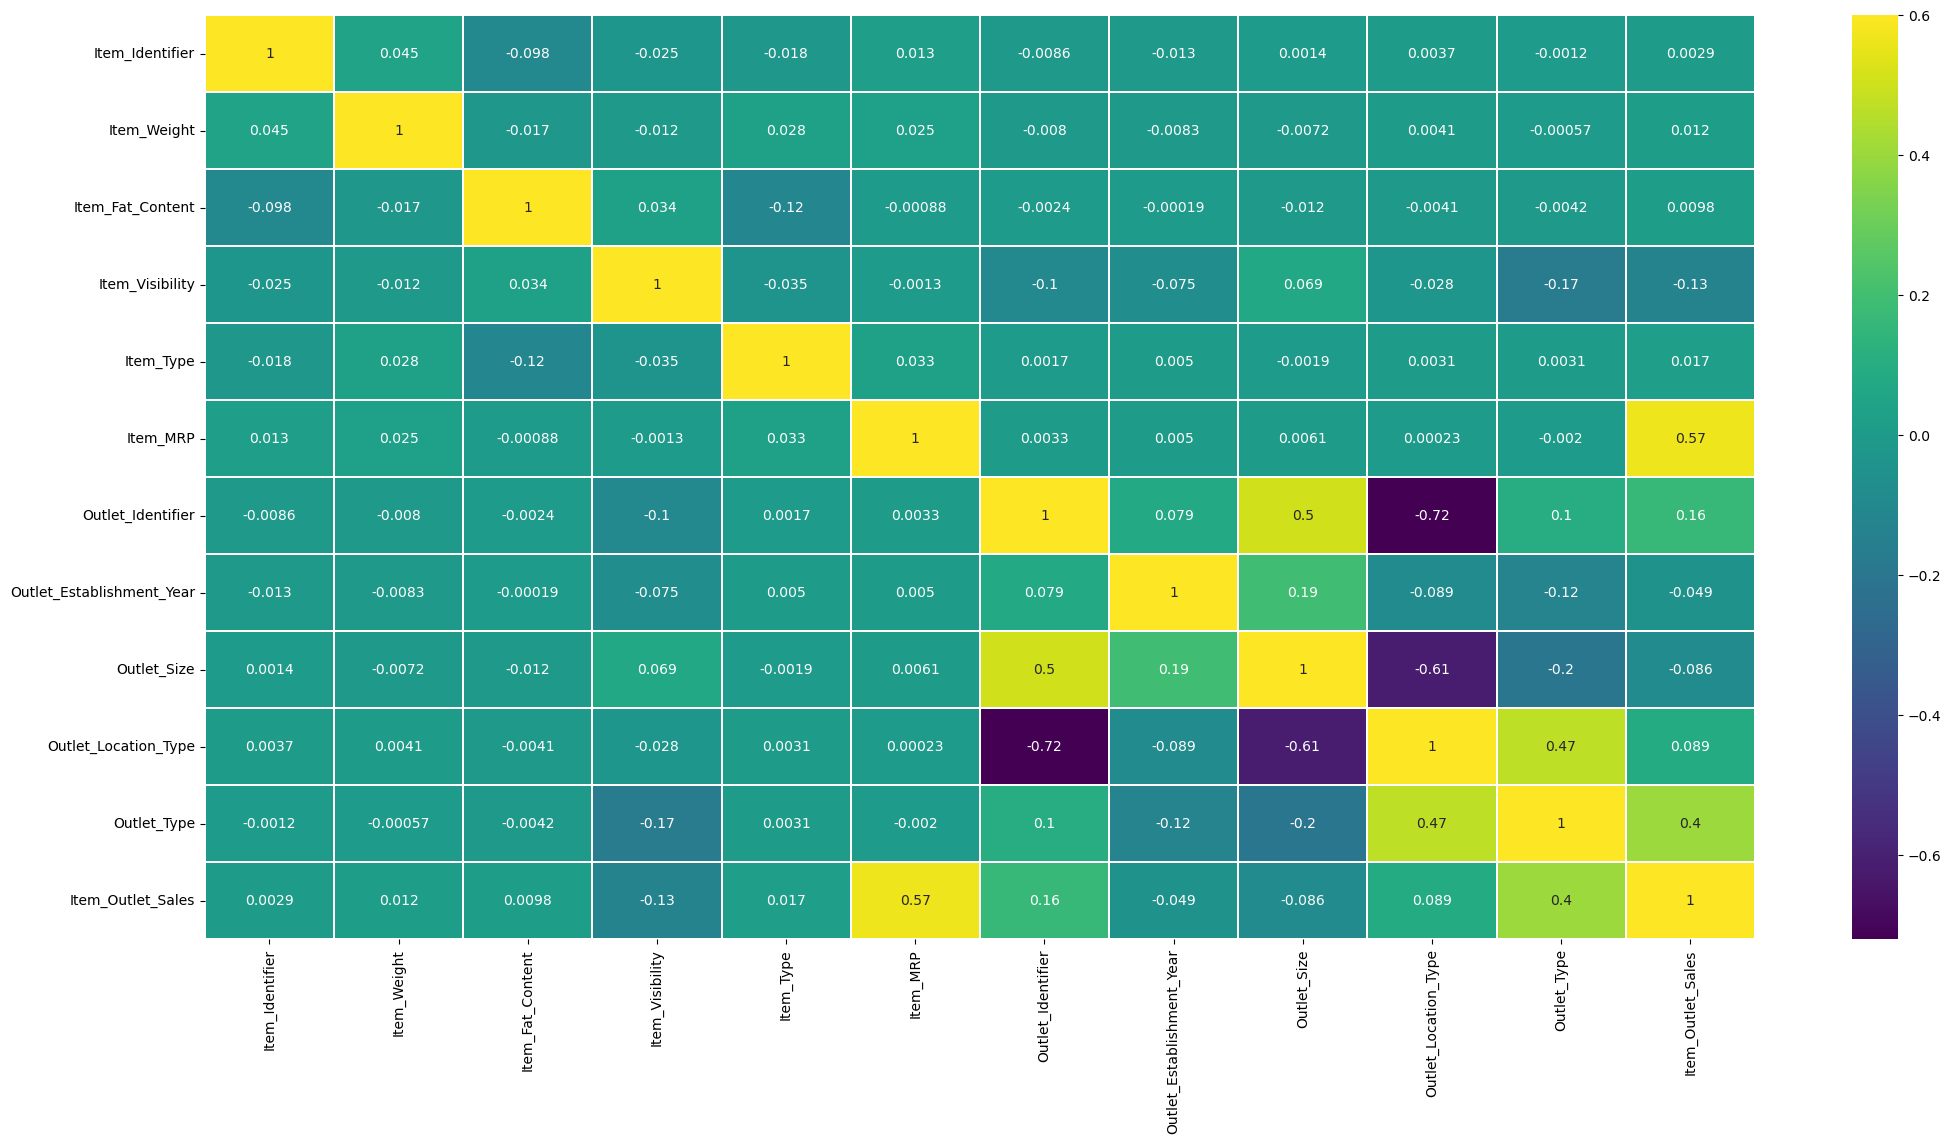

In [42]:
correlation = train.corr()
plt.figure(figsize=(25,12))
sns.heatmap(correlation,cmap="viridis", annot=True, vmin=-0.72, vmax= 0.6,linewidths=0.2)

In [43]:
#save preprocessed file

In [44]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [45]:
train2=pd.read_csv("train_modified.csv")

In [46]:
train2.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [47]:
test2=pd.read_csv('test_modified.csv')

In [48]:
test2.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [49]:
#TRAIN THE MODEL

In [50]:
#seperation of target and feature
#y_train=train2['Item_Outlet_Sales']
#X_train=train2.drop('Item_Outlet_Sales',axis=1)

In [51]:
y=train2['Item_Outlet_Sales']
X=train2.drop('Item_Outlet_Sales',axis=1)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

# LINEAR REGRESSION

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import classification_report



In [55]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions

array([1096.5116199 ,  619.57471207, 1092.09171381, ...,  524.48065719,
       1137.24356314, 1759.54704511])

In [56]:
lr_accuracy = model.score(X_train,y_train) *100
lr_accuracy

50.63667106696854

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
print("MSE      :", mean_squared_error(y_test,predictions))
print('R2 Score :',r2_score(y_test,predictions))

MSE      : 1291511.9190647884
R2 Score : 0.5248248187396567


# RANDOM FOREST REGRESSOR


In [59]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [60]:
y_pred = regressor.predict(X_test)


In [61]:
y_pred

array([1361.09972745,  672.39040777,  662.11802182, ...,  660.61575035,
        748.91970225, 1660.07202659])

In [62]:
rf_accuracy = regressor.score(X_train,y_train)*100
rf_accuracy

60.95931801652094

In [63]:
print("MSE      :", mean_squared_error(y_test,y_pred))
print('R2 Score :',r2_score(y_test,y_pred))

MSE      : 1037782.2682615329
R2 Score : 0.6181774475708834


# Gradient boost regressor

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
gbt = GradientBoostingRegressor(n_estimators=500,max_depth=16,random_state=42)


In [66]:
gbt_model = gbt.fit(X_train,y_train)

In [67]:
gbt_pred = gbt_model.predict(X_test)

In [68]:
print('Mean Squared Error: ',mean_squared_error(gbt_pred,y_test))
print('R2 Score          : ',r2_score(gbt_pred,y_test))

Mean Squared Error:  1486407.963074438
R2 Score          :  0.30867694058176076


# Hyperparameter Tuning Using gridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [70]:
parameters={'n_estimators':[50,100,150,250],'max_depth':[3,6,9,None]}

In [71]:
# Hyperparameter Tuning-GridSearchCV
grid_model=GridSearchCV(RandomForestRegressor(),parameters,scoring='f1')
grid_model.fit(X_train,y_train)
print(grid_model.best_params_)

{'max_depth': 3, 'n_estimators': 50}


In [72]:
model_grid=RandomForestRegressor(n_estimators=50,max_depth=3)
model1=model_grid.fit(X_train,y_train)
y_pred_grid=model1.predict(X_test)

In [73]:
print('Mean Squared Error: ',mean_squared_error(y_pred_grid,y_test))
print('R2 Score          : ',r2_score(y_pred_grid,y_test))

Mean Squared Error:  1202871.6604701066
R2 Score          :  0.16420831614558828


# modeling on test data

In [74]:
y_pred = regressor.predict(test2)


In [75]:
y_pred

array([1649.29650303, 1381.17964484,  584.80615639, ..., 1990.94211079,
       3607.80119271, 1298.24856065])

# UPLOAD SAMPLE SUBMISSION FILE


In [76]:
sample_sub=pd.read_csv(r"C:\Users\user\Downloads\sample_submission_8RXa3c6.csv")

In [77]:
sample_sub.head(2)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000


In [78]:
submission.head(4)

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017


In [79]:
submission.isna().sum()

Item_Identifier      0
Outlet_Identifier    0
dtype: int64

In [80]:
y_pred.shape

(5681,)

In [81]:
y_pred.dtype

dtype('float64')

In [82]:
submission['Item_Outlet_Sales'] = y_pred

In [83]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1649.296503
1,FDW14,OUT017,1381.179645
2,NCN55,OUT010,584.806156
3,FDQ58,OUT017,2450.843332
4,FDY38,OUT027,6311.043372


In [84]:
submission.to_csv('submission.csv',index=False)